# Explore here

It's recommended to use this notebook for exploration purposes.

In [1]:
pip install pandas requests


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import requests
import time
from bs4 import BeautifulSoup
import re

# Seleccionar el recurso a descargar
resource_url = "https://es.wikipedia.org/wiki/Leucocito"

# Petición para descargar el fichero de Internet
response = requests.get(resource_url)
response
    

<Response [200]>

In [3]:
# Transformamos el HTML plano en un HTML real (estructurado y anidado, con forma de árbol)
soup = BeautifulSoup(response.text, "html.parser")
soup


<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-toc-available" dir="ltr" lang="es">
<head>
<meta charset="utf-8"/>
<title>Leucocito - Wikipedia, la enciclopedia libre</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature

In [5]:
table = soup.find_all("table")
table


[<table class="infobox" style="width:22.7em; line-height: 1.4em; text-align:left; padding:.23em;"><tbody><tr><th class="cabecera medicina" colspan="3" style="text-align:center;background-color:#FFE4BF;color:inherit;color: #000000;;">Leucocito</th></tr><tr><td class="imagen" colspan="3" style="text-align:center;">
 <span typeof="mw:File"><a class="mw-file-description" href="/wiki/Archivo:Red_White_Blood_cells.jpg"><img class="mw-file-element" data-file-height="326" data-file-width="500" decoding="async" height="209" src="//upload.wikimedia.org/wikipedia/commons/thumb/2/24/Red_White_Blood_cells.jpg/320px-Red_White_Blood_cells.jpg" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/2/24/Red_White_Blood_cells.jpg/480px-Red_White_Blood_cells.jpg 1.5x, //upload.wikimedia.org/wikipedia/commons/2/24/Red_White_Blood_cells.jpg 2x" width="320"/></a></span><br/><div style="display:inline;">Imagen tomada con un <a href="/wiki/Microscopio_electr%C3%B3nico" title="Microscopio electrónico">microsc

In [4]:
leucocito = soup.find_all("table", class_="wikitable")
leucocito

[<table class="wikitable">
 <tbody><tr>
 <th>Tipo</th>
 <th>Apariencia microscópica</th>
 <th>Diagrama</th>
 <th>Porcentaje aproximado en adultos</th>
 <th>Diámetro (μm)</th>
 <th><sup class="reference separada" id="cite_ref-isbn0-443-01657-7_7-0"><a href="#cite_note-isbn0-443-01657-7-7"><span class="corchete-llamada">[</span>7<span class="corchete-llamada">]</span></a></sup>​ Principal objetivo</th>
 <th><sup class="reference separada" id="cite_ref-alberts_table_4-1"><a href="#cite_note-alberts_table-4"><span class="corchete-llamada">[</span>4<span class="corchete-llamada">]</span></a></sup>​ Núcleo</th>
 <th><sup class="reference separada" id="cite_ref-alberts_table_4-2"><a href="#cite_note-alberts_table-4"><span class="corchete-llamada">[</span>4<span class="corchete-llamada">]</span></a></sup>​ Gránulos</th>
 <th><sup class="reference separada" id="cite_ref-alberts_table_4-3"><a href="#cite_note-alberts_table-4"><span class="corchete-llamada">[</span>4<span class="corchete-llamada"

In [5]:
import pandas as pd 
# Obtener las filas de la tabla
rows = leucocito[0].find_all("tr")

# Inicializar listas para almacenar los datos de las filas y columnas
data = []
columns = []

# Obtener los encabezados de la tabla (nombres de columnas)
for th in rows[0].find_all("th"):
    columns.append(th.text.strip())

# Obtener los datos de las filas
for row in rows[1:]:
    row_data = [td.text.strip() for td in row.find_all("td")]
    data.append(row_data)

# Crear el DataFrame
df = pd.DataFrame(data, columns=columns)
df



,Tipo,Apariencia microscópica,Diagrama,Porcentaje aproximado en adultos,Diámetro (μm),[7]​ Principal objetivo,[4]​ Núcleo,[4]​ Gránulos,[4]​ Vida media[7]​
0,Neutrófilo,,,62%,10-12,Bacterias\nHongos\nVirus,Multilobulado,"Fino, ligeramente rosado (tinción HyE)","6 horas-unos cuantos días, dura días en bazo y..."
1,Eosinófilo,,,2.3%,10-12,Macroparásitos\nModulan respuesta alérgica inf...,Bi-lobulado,Se encuentran en un color rosa-anaranjado,8–12 días; circulan por 4 o 5 horas en el torr...
2,Basófilo,,,0.4%,12-15,Liberan histamina para respuesta inflamatoria,Bi-lobulado o tri-lobulado,Azul oscuro,De pocas horas hasta pocos días
3,Linfocito,,,30%,Linfocitos pequeños: 7–8 Linfocitos grandes: 1...,Linfocitos B: libera anticuerpos y coopera par...,Es excéntrico y se tiñe fuertemente,Células NK y células CD8 citotóxicas,"Años, para células de memoria; y semanas para ..."
4,Monocito,,,5.3%,12-15[8]​,Los monocitos migran desde el torrente sanguín...,Arriñonado,Ninguno,De horas a días


In [15]:
import pandas as pd

columnas_seleccionadas = ['Tipo', 'Porcentaje aproximado en adultos', 'Diámetro (μm)']
nuevo_dataframe = df[columnas_seleccionadas]

#nuevo_dataframe['Porcentaje aproximado en adultos'] = nuevo_dataframe['Porcentaje aproximado en adultos'].replace('[\%,]', '', regex=True).astype(float)

nuevo_dataframe = nuevo_dataframe.dropna()
nuevo_dataframe.head()

,Tipo,Porcentaje aproximado en adultos,Diámetro (μm)
0,Neutrófilo,62%,10-12
1,Eosinófilo,2.3%,10-12
2,Basófilo,0.4%,12-15
3,Linfocito,30%,Linfocitos pequeños: 7–8 Linfocitos grandes: 1...
4,Monocito,5.3%,12-15[8]​


In [8]:

import sqlite3
con = sqlite3.connect("nuevo_dataframe.db")

nuevo_dataframe.to_sql("nuevo_dataframe", con, index=False, if_exists='replace')

con.commit()
con.close()


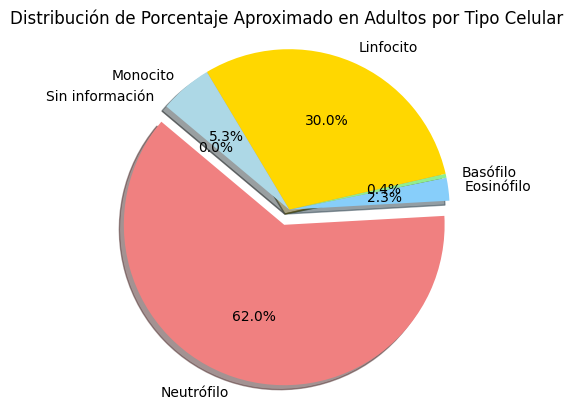

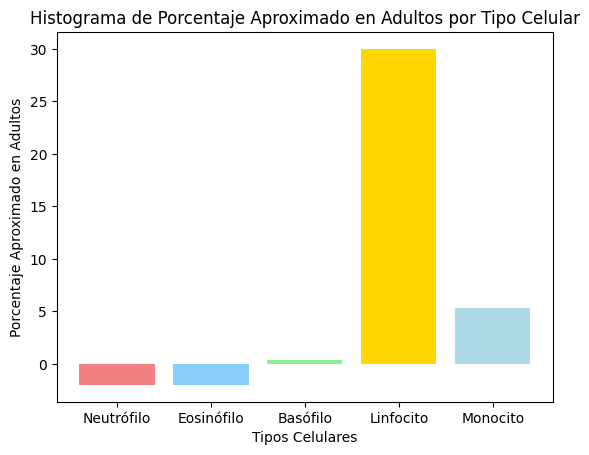

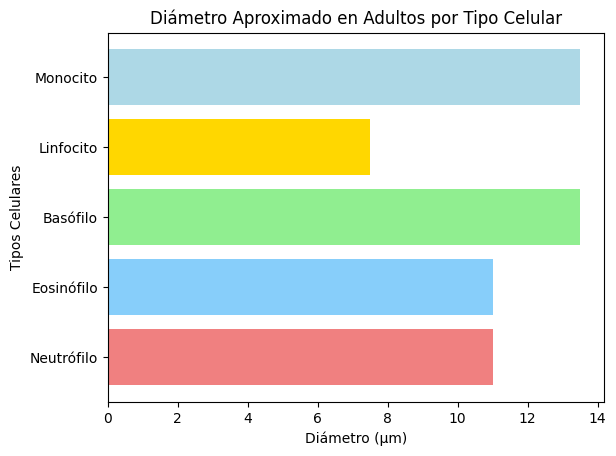

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Piechart

labels = 'Neutrófilo', 'Eosinófilo', 'Basófilo', 'Linfocito', 'Monocito', 'Sin información'
sizes =  [62.0, 2.3, 0.4, 30.0, 5.3, len(df) - len(nuevo_dataframe)]
colors = ['lightcoral', 'lightskyblue', 'lightgreen', 'gold', 'lightblue', 'lightgray']
explode = (0.1, 0, 0, 0, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Asegura que el gráfico de torta sea un círculo.

plt.title('Distribución de Porcentaje Aproximado en Adultos por Tipo Celular')
plt.show()

## Histogram
porcentajes = [10-12, 10-12, 0.4, 30.0, 5.3]
tipos_celulares = ['Neutrófilo', 'Eosinófilo', 'Basófilo', 'Linfocito', 'Monocito']
plt.bar(tipos_celulares, porcentajes, color=['lightcoral', 'lightskyblue', 'lightgreen', 'gold', 'lightblue'])
plt.xlabel('Tipos Celulares')
plt.ylabel('Porcentaje Aproximado en Adultos')
plt.title('Histograma de Porcentaje Aproximado en Adultos por Tipo Celular')
plt.show()

###Horizontal bar chart
diametros = [(10, 12), (10, 12), (12, 15), (7, 8), (12, 15)] 
valores_centrales = [(inicio + fin) / 2 for inicio, fin in diametros]

plt.barh(tipos_celulares, valores_centrales , color=['lightcoral', 'lightskyblue', 'lightgreen', 'gold', 'lightblue'])
plt.xlabel('Diámetro (μm)')
plt.ylabel('Tipos Celulares')
plt.title('Diámetro Aproximado en Adultos por Tipo Celular')

plt.show()
